### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта 

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 2


### Дисциплина: Методы машинного обучения

##### Студент:  Генералов Даниил
##### Группа:   НПИбд-01-21

## Москва 2024
***

### Вариант №22

Текст задания:

1. Набор данных: diamonds 

2. Независимая переменная: features/carat 

3. Зависимая переменная: features/y 

4. Доп. признак: имеющий минимальную ковариацию с независимой переменной 

5. Визуализация доп. признака – эмпирическая плотность распределения 

6. Показатель качества регрессии – R^2 (коэффициент детерминации) 

7. Степень полинома: 3 

8. Параметры глубокой нейронной сети: кол-во скрытых слоев – 5, кол-во нейронов в скрытом слое – 32, функция активации – сигмоида. 

1.	Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимый признак и зависимый признак (отклик). Оставьте в наборе признаки, принимающие числовые значения.
2.	Удалите из набора точки с выбросами при помощи стандартизованной оценки (Z-score) таким образом, чтобы точки с выбросами составляли от 5% до 10% всех точек набора данных. Визуализируйте точки исходного набора данных на плоскости в виде диаграммы рассеяния (ось X – независимый признак, ось Y – зависимый признак), показывая оставленные в наборе точки и удаленные точки разными цветами, подписывая оси и рисунок и создавая легенду.
3.	Выполните стандартизацию независимого признака и масштабирование на интервал [-1, 1] зависимого признака. Решите задачи линейной регрессии и полиномиальной регрессии для степени полинома, указанной в индивидуальном задании, при помощи нейронных сетей с одним нейроном и оцените качество полученных моделей по показателю, указанному в индивидуальном задании. Отследите обучение нейронных сетей, изменяя, при необходимости, гиперпараметры (функцию потерь, оптимизатор, шаг обучения и т.п.) или применяя регуляризацию.
4.	Постройте кривые обучения для построенных нейронных сетей с зависимостью от количества эпох. На визуализации создайте легенду.
5.	Визуализируйте точки набора данных на плоскости в виде диаграммы рассеяния (ось X – независимый признак, ось Y – зависимый признак), а также линии линейной и полиномиальной регрессий (другими цветами), подписывая оси и рисунок и создавая легенду.
6.	Определите в исходном наборе данных признак (отличный от независимого и зависимого признаков), принимающий непрерывные значения и имеющий свойства, указанные в индивидуальном задании.
7.	Стандартизуйте этот признак и визуализируйте его в соответствии с индивидуальным заданием.
8.	Сформируйте набор входных данных из двух стандартизованных признаков набора данных (независимый признак и определенный признак), постройте нейронную сеть (нелинейный регресор) с количеством скрытых слоев, количеством нейронов и функцией активации, указанными в индивидуальном задании, и одним нейроном в выходном слое и обучите ее на наборе данных из двух признаков и отклика. Отследите обучение нейронной сети, изменяя, при необходимости, гиперпараметры (функцию потерь, оптимизатор, шаг обучения и т.п.) или применяя регуляризацию.
9.	Визуализируйте набор данных в виде диаграммы рассеяния и прогноз нейронной сети в виде поверхности в трехмерном пространстве, подписывая оси и рисунок.
10.	Разбейте набор данных из двух признаков и отклика на обучающую и тестовую выборки и постройте кривые обучения для заданного показателя качества в зависимости от количества точек в обучающей выборке, подписывая оси и рисунок и создавая легенду.



# 1: загрузка данных

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds

2024-04-26 01:01:31.458388: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-26 01:01:32.679293: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
dataset = tfds.load('diamonds', split='train')
df = tfds.as_dataframe(dataset)
len(df)

2024-04-26 01:01:40.881680: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-04-26 01:01:56.245830: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


53940

In [3]:
df.head()

,features/carat,features/clarity,features/color,features/cut,features/depth,features/table,features/x,features/y,features/z,price
0,1.26,2,4,2,60.599998,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.099998,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.700001,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.000000,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.200001,54.0,4.43,4.45,2.76,646.0


# 2. удаление выбросов

<Axes: title={'center': 'Рассеивание признаков исходное'}, xlabel='features/carat', ylabel='features/y'>

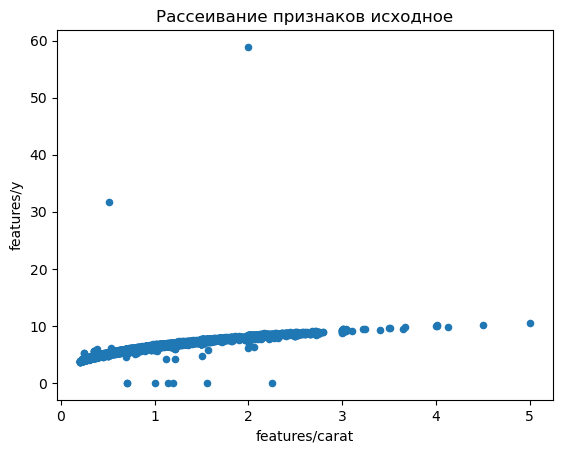

In [4]:
X_axis = "features/carat"
Y_axis = "features/y"
df.plot.scatter(X_axis, Y_axis, title="Рассеивание признаков исходное")

In [5]:
import scipy.stats
df_with_scores = df.apply(scipy.stats.zscore)
df_with_scores.head()

,features/carat,features/clarity,features/color,features/cut,features/depth,features/table,features/x,features/y,features/z,price
0,0.974797,-0.638095,0.826413,-0.809695,-0.802317,1.137995,1.104384,1.108000,0.979558,0.655035
1,0.004347,-0.030975,0.826413,0.981473,0.244724,-1.547205,0.204005,0.223683,0.242693,-0.226299
2,-0.501975,0.576145,-0.349304,0.981473,-0.034485,-1.547205,-0.402190,-0.362943,-0.380809,-0.505790
3,1.502215,-0.030975,2.002131,-1.705279,1.570978,0.242928,1.345079,1.344402,1.560547,0.752794
4,-0.987200,1.790385,1.414272,0.981473,0.314528,-1.547205,-1.159934,-1.124682,-1.103503,-0.823883


In [6]:
from IPython.display import display as disp, Markdown as MD

## Удалено 6.346%

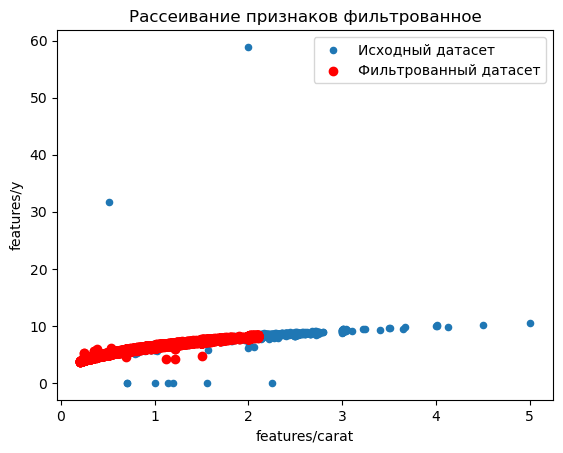

In [7]:
df_filtered = df[abs(df_with_scores) < 2.75]

df_filtered.dropna(inplace=True)

retained_count = len(df_filtered)
retained_frac = retained_count / len(df)
deleted_frac = 1-retained_frac

disp(MD(f"## Удалено {round(deleted_frac * 100, 3)}%"))

plt = df.plot.scatter(X_axis, Y_axis, title="Рассеивание признаков фильтрованное", label='Исходный датасет')
plt.scatter(df_filtered[X_axis], df_filtered[Y_axis], color='red', label='Фильтрованный датасет')
plt.legend()

In [8]:
df = df_filtered

# 3. стандартизация/масштабирование для регрессии

<Axes: title={'center': 'Датасет с стандартизированным features/carat'}, xlabel='features/carat', ylabel='features/y'>

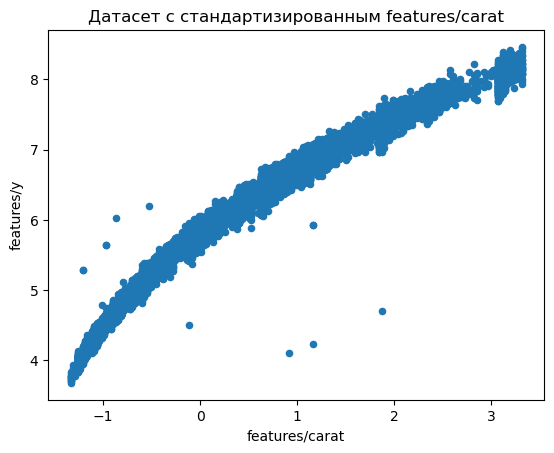

In [9]:
mean_x = np.mean(df[X_axis])
std_x = np.std(df[X_axis])

df[X_axis] -= mean_x
df[X_axis] /= std_x
df.plot.scatter(X_axis, Y_axis, title=f'Датасет с стандартизированным {X_axis}')

<Axes: title={'center': 'Стандартизированный features/carat и масштабированный features/y'}, xlabel='features/carat', ylabel='features/y'>

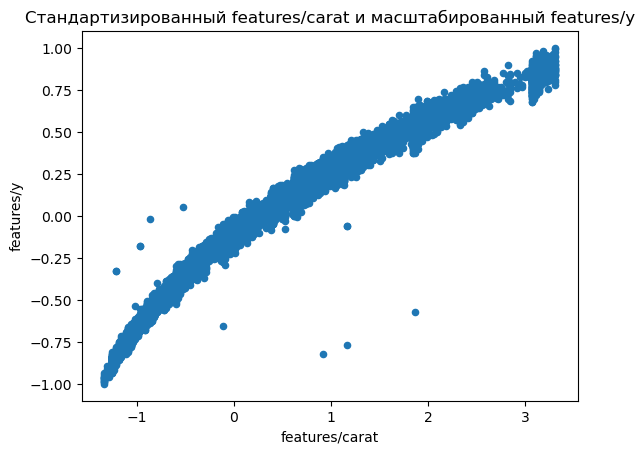

In [10]:
min_y = min(df[Y_axis])
max_y = max(df[Y_axis])
df[Y_axis] = ((df[Y_axis] - min_y) / (max_y - min_y) - 0.5) * 2

df.plot.scatter(X_axis, Y_axis, title=f"Стандартизированный {X_axis} и масштабированный {Y_axis}")

# 3. линейная регрессия (1 нейрон)

In [11]:
linear_model = tf.keras.Sequential([
    tf.keras.layers.Input((1,)),
    tf.keras.layers.Dense(1)
])
linear_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
linear_model.compile(
    loss = tf.keras.losses.MAE,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.05),
    metrics=['r2_score']
)

linear_model_hist = linear_model.fit(df[X_axis], df[Y_axis], epochs=250, verbose=1, validation_split=0.25)

Epoch 1/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2103 - r2_score: -0.5153 - val_loss: 0.0784 - val_r2_score: 0.9512
Epoch 2/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0640 - r2_score: 0.9564 - val_loss: 0.0739 - val_r2_score: 0.9603
Epoch 3/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0637 - r2_score: 0.9564 - val_loss: 0.0643 - val_r2_score: 0.9654
Epoch 4/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0637 - r2_score: 0.9564 - val_loss: 0.0692 - val_r2_score: 0.9630
Epoch 5/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0646 - r2_score: 0.9565 - val_loss: 0.0613 - val_r2_score: 0.9613
Epoch 6/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0644 - r2_score: 0.9546 - val_loss: 0.0621 - val_r2_score: 0.9579
Epoch 7/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0643 - r2_score: 0.9556 - val_loss: 0.0616 - val_r2_score: 0.9618
Epoch 8/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0646 - r2_score: 

1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0640 - r2_score: 0.9566 - val_loss: 0.0618 - val_r2_score: 0.9576
Epoch 51/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0641 - r2_score: 0.9565 - val_loss: 0.0612 - val_r2_score: 0.9618
Epoch 52/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0644 - r2_score: 0.9555 - val_loss: 0.0620 - val_r2_score: 0.9542
Epoch 53/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0635 - r2_score: 0.9563 - val_loss: 0.0611 - val_r2_score: 0.9611
Epoch 54/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0654 - r2_score: 0.9542 - val_loss: 0.0668 - val_r2_score: 0.9467
Epoch 55/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0642 - r2_score: 0.9555 - val_loss: 0.0653 - val_r2_score: 0.9650
Epoch 56/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0654 - r2_score: 0.9549 - val_loss: 0.0664 - val_r2_score: 0.9430
Epoch 57/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0631 - r2_score: 0.9576

1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step - loss: 0.0648 - r2_score: 0.9560 - val_loss: 0.0660 - val_r2_score: 0.9629
Epoch 100/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 875us/step - loss: 0.0646 - r2_score: 0.9562 - val_loss: 0.0613 - val_r2_score: 0.9577
Epoch 101/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 898us/step - loss: 0.0641 - r2_score: 0.9557 - val_loss: 0.0614 - val_r2_score: 0.9581
Epoch 102/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - loss: 0.0639 - r2_score: 0.9558 - val_loss: 0.0620 - val_r2_score: 0.9542
Epoch 103/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step - loss: 0.0637 - r2_score: 0.9575 - val_loss: 0.0634 - val_r2_score: 0.9591
Epoch 104/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 902us/step - loss: 0.0636 - r2_score: 0.9565 - val_loss: 0.0636 - val_r2_score: 0.9590
Epoch 105/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step - loss: 0.0636 - r2_score: 0.9558 - val_loss: 0.0647 - val_r2_score: 0.9610
Epoch 106/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 961us/step - loss: 0.

Epoch 148/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0647 - r2_score: 0.9552 - val_loss: 0.0673 - val_r2_score: 0.9381
Epoch 149/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0639 - r2_score: 0.9569 - val_loss: 0.0623 - val_r2_score: 0.9643
Epoch 150/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0634 - r2_score: 0.9569 - val_loss: 0.0677 - val_r2_score: 0.9643
Epoch 151/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0638 - r2_score: 0.9563 - val_loss: 0.0655 - val_r2_score: 0.9415
Epoch 152/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0646 - r2_score: 0.9561 - val_loss: 0.0630 - val_r2_score: 0.9645
Epoch 153/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0642 - r2_score: 0.9557 - val_loss: 0.0695 - val_r2_score: 0.9637
Epoch 154/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0639 - r2_score: 0.9557 - val_loss: 0.0614 - val_r2_score: 0.9603
Epoch 155/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.06

Epoch 197/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0641 - r2_score: 0.9561 - val_loss: 0.0714 - val_r2_score: 0.9623
Epoch 198/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0639 - r2_score: 0.9573 - val_loss: 0.0621 - val_r2_score: 0.9640
Epoch 199/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0642 - r2_score: 0.9570 - val_loss: 0.0630 - val_r2_score: 0.9639
Epoch 200/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0645 - r2_score: 0.9560 - val_loss: 0.0621 - val_r2_score: 0.9637
Epoch 201/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0635 - r2_score: 0.9564 - val_loss: 0.0634 - val_r2_score: 0.9590
Epoch 202/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0638 - r2_score: 0.9550 - val_loss: 0.0620 - val_r2_score: 0.9596
Epoch 203/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0636 - r2_score: 0.9573 - val_loss: 0.0651 - val_r2_score: 0.9616
Epoch 204/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.06

Epoch 246/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0642 - r2_score: 0.9566 - val_loss: 0.0667 - val_r2_score: 0.9582
Epoch 247/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0653 - r2_score: 0.9548 - val_loss: 0.0639 - val_r2_score: 0.9642
Epoch 248/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0640 - r2_score: 0.9560 - val_loss: 0.0626 - val_r2_score: 0.9609
Epoch 249/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0647 - r2_score: 0.9547 - val_loss: 0.0656 - val_r2_score: 0.9510
Epoch 250/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0643 - r2_score: 0.9565 - val_loss: 0.0628 - val_r2_score: 0.9546


# 3. полиномиальная регрессия (1 нейрон)

In [13]:
df[X_axis].shape

(50517,)

In [14]:
x = np.reshape(df[X_axis], (-1, 1))
x.shape

(50517, 1)

In [15]:
x2 = np.hstack([x, x**3])
x2.shape

(50517, 2)

In [16]:
polynomial_oneneuron_model = tf.keras.Sequential([
    tf.keras.layers.Input((2,)),
    tf.keras.layers.Dense(1)
])
polynomial_oneneuron_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
polynomial_oneneuron_model.compile(
    loss=tf.keras.losses.MAE,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
    metrics=["r2_score"]
)
polynomial_oneneuron_model_hist = polynomial_oneneuron_model.fit(x2, df[Y_axis], epochs=250, verbose=1, validation_split=0.25)

Epoch 1/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2658 - r2_score: -10.7016 - val_loss: 0.1070 - val_r2_score: 0.8250
Epoch 2/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0619 - r2_score: 0.9488 - val_loss: 0.0557 - val_r2_score: 0.9629
Epoch 3/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0578 - r2_score: 0.9606 - val_loss: 0.0550 - val_r2_score: 0.9753
Epoch 4/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0584 - r2_score: 0.9603 - val_loss: 0.0615 - val_r2_score: 0.9577
Epoch 5/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0582 - r2_score: 0.9603 - val_loss: 0.0530 - val_r2_score: 0.9767
Epoch 6/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0595 - r2_score: 0.9561 - val_loss: 0.0538 - val_r2_score: 0.9647
Epoch 7/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0632 - r2_score: 0.9424 - val_loss: 0.0554 - val_r2_score: 0.9739
Epoch 8/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0617 - r2_score:

1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0646 - r2_score: 0.9333 - val_loss: 0.0594 - val_r2_score: 0.9434
Epoch 51/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0616 - r2_score: 0.9486 - val_loss: 0.0707 - val_r2_score: 0.9378
Epoch 52/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0593 - r2_score: 0.9599 - val_loss: 0.0670 - val_r2_score: 0.9550
Epoch 53/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0613 - r2_score: 0.9525 - val_loss: 0.0651 - val_r2_score: 0.9610
Epoch 54/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0616 - r2_score: 0.9486 - val_loss: 0.0489 - val_r2_score: 0.9812
Epoch 55/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0604 - r2_score: 0.9509 - val_loss: 0.0697 - val_r2_score: 0.9517
Epoch 56/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0635 - r2_score: 0.9485 - val_loss: 0.0573 - val_r2_score: 0.9689
Epoch 57/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0609 - r2_score: 0.9544

1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0586 - r2_score: 0.9589 - val_loss: 0.0548 - val_r2_score: 0.9653
Epoch 100/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0594 - r2_score: 0.9579 - val_loss: 0.0505 - val_r2_score: 0.9776
Epoch 101/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0601 - r2_score: 0.9537 - val_loss: 0.0499 - val_r2_score: 0.9806
Epoch 102/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0577 - r2_score: 0.9615 - val_loss: 0.0637 - val_r2_score: 0.9551
Epoch 103/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0607 - r2_score: 0.9520 - val_loss: 0.0501 - val_r2_score: 0.9800
Epoch 104/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step - loss: 0.0596 - r2_score: 0.9557 - val_loss: 0.0701 - val_r2_score: 0.9528
Epoch 105/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 975us/step - loss: 0.0625 - r2_score: 0.9465 - val_loss: 0.0776 - val_r2_score: 0.8951
Epoch 106/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0591 - r2_sc

1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0624 - r2_score: 0.9442 - val_loss: 0.0635 - val_r2_score: 0.9623
Epoch 149/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0631 - r2_score: 0.9471 - val_loss: 0.0628 - val_r2_score: 0.9648
Epoch 150/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 998us/step - loss: 0.0634 - r2_score: 0.9427 - val_loss: 0.0618 - val_r2_score: 0.9576
Epoch 151/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0614 - r2_score: 0.9486 - val_loss: 0.0600 - val_r2_score: 0.9593
Epoch 152/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0628 - r2_score: 0.9470 - val_loss: 0.0664 - val_r2_score: 0.9639
Epoch 153/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0622 - r2_score: 0.9489 - val_loss: 0.0511 - val_r2_score: 0.9795
Epoch 154/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0609 - r2_score: 0.9523 - val_loss: 0.0550 - val_r2_score: 0.9739
Epoch 155/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0599 - r2_scor

1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 998us/step - loss: 0.0611 - r2_score: 0.9517 - val_loss: 0.0523 - val_r2_score: 0.9783
Epoch 198/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step - loss: 0.0615 - r2_score: 0.9483 - val_loss: 0.0501 - val_r2_score: 0.9766
Epoch 199/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 918us/step - loss: 0.0600 - r2_score: 0.9551 - val_loss: 0.0662 - val_r2_score: 0.9380
Epoch 200/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 920us/step - loss: 0.0622 - r2_score: 0.9486 - val_loss: 0.0572 - val_r2_score: 0.9741
Epoch 201/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - loss: 0.0611 - r2_score: 0.9488 - val_loss: 0.0796 - val_r2_score: 0.9036
Epoch 202/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 936us/step - loss: 0.0589 - r2_score: 0.9567 - val_loss: 0.0753 - val_r2_score: 0.9379
Epoch 203/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 930us/step - loss: 0.0598 - r2_score: 0.9571 - val_loss: 0.0721 - val_r2_score: 0.9301
Epoch 204/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 929us/step - loss: 0.

1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step - loss: 0.0617 - r2_score: 0.9493 - val_loss: 0.0508 - val_r2_score: 0.9766
Epoch 246/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step - loss: 0.0641 - r2_score: 0.9409 - val_loss: 0.0517 - val_r2_score: 0.9788
Epoch 247/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 972us/step - loss: 0.0624 - r2_score: 0.9495 - val_loss: 0.0534 - val_r2_score: 0.9701
Epoch 248/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 969us/step - loss: 0.0594 - r2_score: 0.9578 - val_loss: 0.0704 - val_r2_score: 0.9553
Epoch 249/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step - loss: 0.0611 - r2_score: 0.9511 - val_loss: 0.0565 - val_r2_score: 0.9537
Epoch 250/250
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0644 - r2_score: 0.9374 - val_loss: 0.0719 - val_r2_score: 0.9277


In [18]:
_, line_r2 = linear_model.evaluate(df[X_axis], df[Y_axis])
_, poly_r2 = polynomial_oneneuron_model.evaluate(x2, df[Y_axis])

winner = ["Полиномиальная", "Линейная"][line_r2 > poly_r2]
disp(MD(f"## {winner} регрессия лучше (lin={line_r2}, pol={poly_r2})"))

1579/1579 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - loss: 0.0624 - r2_score: 0.9552
1579/1579 ━━━━━━━━━━━━━━━━━━━━ 1s 624us/step - loss: 0.0713 - r2_score: 0.9291


## Линейная регрессия лучше (lin=0.9548131227493286, pol=0.9284740090370178)

# 4. кривые обучения

In [19]:
import matplotlib.pyplot as plt
def plot_loss(title, history):
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.title(title)
    plt.ylim([0, max(history.history['val_loss']) * 1.25])
    plt.xlabel("Эпохи обучения")
    plt.ylabel("Ошибка")
    plt.legend()
    plt.grid(True)

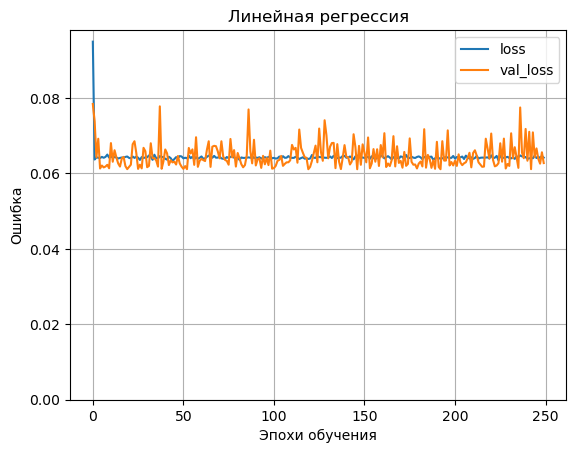

In [20]:
plot_loss("Линейная регрессия", linear_model_hist)

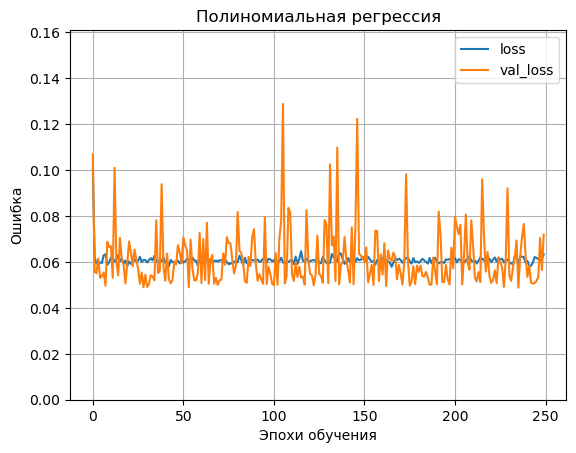

In [21]:
plot_loss("Полиномиальная регрессия", polynomial_oneneuron_model_hist)

# 5. результаты регрессии

In [22]:
lin_pred = linear_model.predict(df[X_axis])
pol_pred = polynomial_oneneuron_model.predict(x2)

1579/1579 ━━━━━━━━━━━━━━━━━━━━ 1s 581us/step
1579/1579 ━━━━━━━━━━━━━━━━━━━━ 1s 575us/step


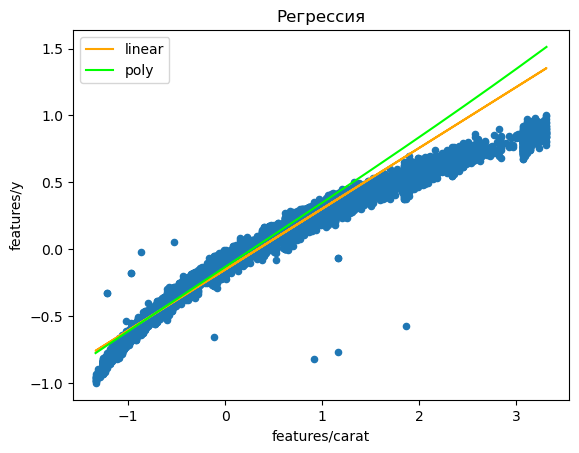

In [23]:
pt = df.plot.scatter(X_axis, Y_axis, title="Регрессия")
pt.plot(df[X_axis], lin_pred, color="orange", label="linear")
pt.plot(np.sort(df[X_axis]), pol_pred[np.argsort(df[X_axis])], color="lime", label="poly")
pt.legend()

# 6. дополнительный признак

In [24]:
cov = df.cov()
x_cov = cov[X_axis].apply(abs)
x_cov_minidx = x_cov.argmin()
Z_axis = x_cov.keys()[x_cov_minidx]
disp(MD(f"## Дополнительный признак `{Z_axis}` (abs_ковариация = {x_cov[Z_axis]})"))

## Дополнительный признак `features/depth` (abs_ковариация = 0.033417204606394794)

# 7. стандартизация, визуализация признака

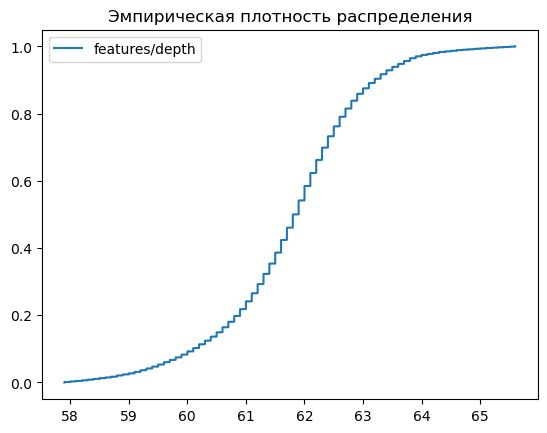

In [25]:
x_values = np.sort(df[Z_axis])
y_values = np.arange(len(x_values)) / (len(x_values)+0.0)

fig, ax = plt.subplots()
plt.plot(x_values, y_values, label=Z_axis)
ax.set_title("Эмпирическая плотность распределения")
plt.legend()

In [26]:
mean_z = np.mean(df[Z_axis])
std_z = np.std(df[Z_axis])
df[Z_axis] -= mean_z
df[Z_axis] /= std_z

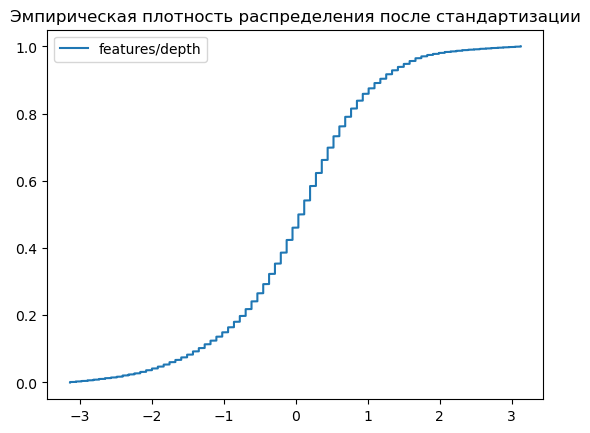

In [27]:
x_values = np.sort(df[Z_axis])
y_values = np.arange(len(x_values)) / (len(x_values)+0.0)

fig, ax = plt.subplots()
plt.plot(x_values, y_values, label=Z_axis)
ax.set_title("Эмпирическая плотность распределения после стандартизации")
plt.legend()

# 8. нейросеть с скрытыми слоями

In [28]:
input_data = df[[X_axis, Z_axis]]
output_data = df[Y_axis]
input_data.shape

(50517, 2)

Text(0.5, 0.92, 'Визуализация данных')

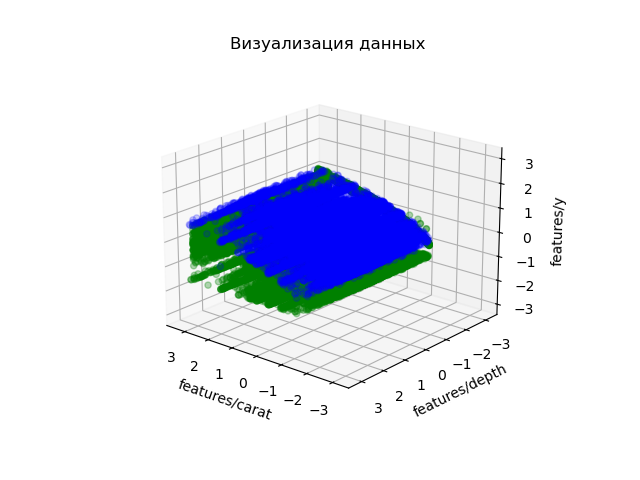

In [50]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel(X_axis)
ax.set_ylabel(Z_axis)
ax.set_zlabel(Y_axis)

xo=3
yo=-3
zo=-1.5

ax.scatter(input_data[X_axis], input_data[Z_axis], output_data, alpha=0.2, color='blue')
ax.scatter(input_data[X_axis], input_data[Z_axis], zdir='z', alpha=0.3, zs=zo, color='green')
ax.scatter(input_data[X_axis], output_data, zdir='y', alpha=0.3, zs=yo, color='green')
ax.scatter(input_data[Z_axis], output_data, zdir='x', alpha=0.3, zs=xo, color='green')

ax.view_init(azim=130, elev=20)
ax.set_title("Визуализация данных")

In [30]:
normalizer = tf.keras.layers.Normalization(axis=None)
normalizer.adapt(input_data.to_numpy())

In [31]:
deep_model = tf.keras.Sequential([
    tf.keras.layers.Input((2,)),
    normalizer,
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(1),
])
deep_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 2)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,356 (17.02 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 3 (16.00 B)

In [32]:
deep_model.compile(
    loss=tf.keras.losses.MAE,
    metrics=["r2_score"],
)

deep_model_hist = deep_model.fit(input_data, output_data, epochs=150, validation_split=0.25)

Epoch 1/150
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2734 - r2_score: 0.3087 - val_loss: 0.0532 - val_r2_score: 0.9768
Epoch 2/150
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0511 - r2_score: 0.9760 - val_loss: 0.0502 - val_r2_score: 0.9794
Epoch 3/150
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0485 - r2_score: 0.9787 - val_loss: 0.0448 - val_r2_score: 0.9818
Epoch 4/150
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0467 - r2_score: 0.9800 - val_loss: 0.0517 - val_r2_score: 0.9780
Epoch 5/150
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0458 - r2_score: 0.9807 - val_loss: 0.0316 - val_r2_score: 0.9902
Epoch 6/150
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0438 - r2_score: 0.9828 - val_loss: 0.0460 - val_r2_score: 0.9822
Epoch 7/150
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0428 - r2_score: 0.9836 - val_loss: 0.0449 - val_r2_score: 0.9842
Epoch 8/150
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0412 - r2_score: 0

1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0182 - r2_score: 0.9963 - val_loss: 0.0142 - val_r2_score: 0.9982
Epoch 51/150
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0181 - r2_score: 0.9965 - val_loss: 0.0163 - val_r2_score: 0.9976
Epoch 52/150
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0179 - r2_score: 0.9965 - val_loss: 0.0232 - val_r2_score: 0.9954
Epoch 53/150
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0179 - r2_score: 0.9964 - val_loss: 0.0144 - val_r2_score: 0.9982
Epoch 54/150
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0179 - r2_score: 0.9965 - val_loss: 0.0192 - val_r2_score: 0.9972
Epoch 55/150
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0176 - r2_score: 0.9965 - val_loss: 0.0245 - val_r2_score: 0.9954
Epoch 56/150
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0179 - r2_score: 0.9961 - val_loss: 0.0139 - val_r2_score: 0.9983
Epoch 57/150
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0176 - r2_score: 0.9966

1184/1184 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0158 - r2_score: 0.9968 - val_loss: 0.0185 - val_r2_score: 0.9973
Epoch 100/150
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0156 - r2_score: 0.9972 - val_loss: 0.0143 - val_r2_score: 0.9981
Epoch 101/150
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0158 - r2_score: 0.9967 - val_loss: 0.0138 - val_r2_score: 0.9983
Epoch 102/150
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0157 - r2_score: 0.9972 - val_loss: 0.0135 - val_r2_score: 0.9984
Epoch 103/150
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0156 - r2_score: 0.9972 - val_loss: 0.0134 - val_r2_score: 0.9984
Epoch 104/150
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0156 - r2_score: 0.9972 - val_loss: 0.0162 - val_r2_score: 0.9979
Epoch 105/150
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0157 - r2_score: 0.9963 - val_loss: 0.0149 - val_r2_score: 0.9981
Epoch 106/150
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0155 - r2_score:

1184/1184 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0146 - r2_score: 0.9977 - val_loss: 0.0155 - val_r2_score: 0.9980
Epoch 149/150
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0147 - r2_score: 0.9970 - val_loss: 0.0137 - val_r2_score: 0.9983
Epoch 150/150
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0145 - r2_score: 0.9976 - val_loss: 0.0138 - val_r2_score: 0.9983


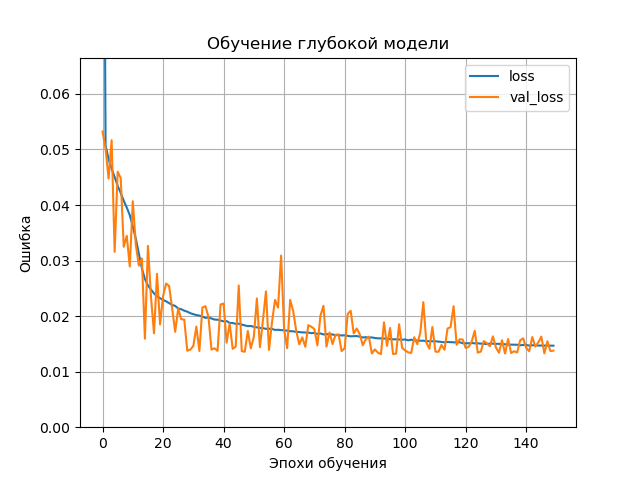

In [36]:
fig = plt.figure()
plot_loss("Обучение глубокой модели", deep_model_hist)

# 9. предсказание как поверхность

62/93 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step

/tmp/ipykernel_56941/2543342538.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step


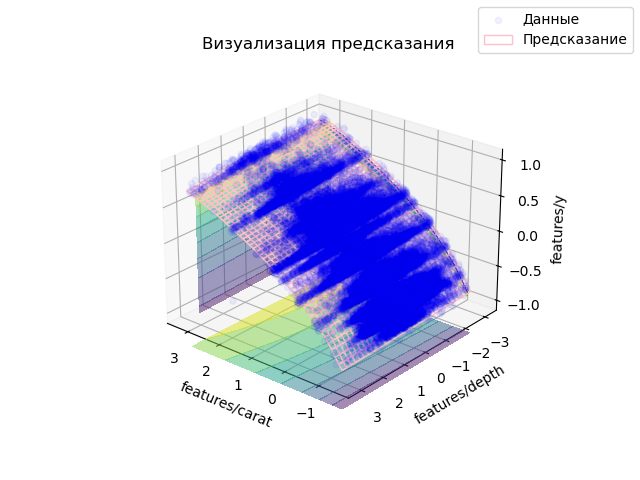

In [53]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel(X_axis)
ax.set_ylabel(Z_axis)
ax.set_zlabel(Y_axis)

xo=3
yo=-3
zo=-1.5

ax.scatter(input_data[X_axis], input_data[Z_axis], output_data, alpha=0.05, color='blue', label='Данные')
# ax.scatter(input_data[X_axis], input_data[Z_axis], zdir='z', alpha=0.3, zs=zo, color='green')
# ax.scatter(input_data[X_axis], output_data, zdir='y', alpha=0.3, zs=yo, color='green')
# ax.scatter(input_data[Z_axis], output_data, zdir='x', alpha=0.3, zs=xo, color='green')

x = np.arange(min(input_data[X_axis]), max(input_data[X_axis]), 0.1)
y = np.arange(min(input_data[Z_axis]), max(input_data[Z_axis]), 0.1)
x, y = np.meshgrid(x, y)
points = np.array(list(zip(np.ravel(x), np.ravel(y))))
z = deep_model.predict(points)
z = z.reshape(x.shape)

ax.plot_surface(x, y, z, facecolor=(0,0,0,0), edgecolor='pink', label="Предсказание")
ax.contourf(x,y,z, zdir='z', offset=zo, alpha=0.5)
ax.contourf(x,y,z, zdir='x', offset=xo, alpha=0.5)
ax.contourf(x,y,z, zdir='y', offset=yo, alpha=0.5)


ax.view_init(azim=130, elev=25)
ax.set_title("Визуализация предсказания")
fig.legend()

# 10. разбиение на выборки и кривые обучения

In [54]:
def train_test_split(X, y, test_ratio=0.2, seed=None):
    """возвращает X_train, X_test, y_train, y_test"""
    assert X.shape[0] == y.shape[0], \
        "Размер X должен быть равен размеру y"
    assert 0.0 <= test_ratio <= 1.0, \
        "Неверное значение test_ratio"

    if seed:
        np.random.seed(seed)

    shuffled_indexes = np.random.permutation(len(X))

    test_size = int(len(X) * test_ratio)
    test_indexes = shuffled_indexes[:test_size]
    train_indexes = shuffled_indexes[test_size:]

    X_train = X[train_indexes]
    y_train = y[train_indexes]

    X_test = X[test_indexes]
    y_test = y[test_indexes]

    return X_train, X_test, y_train, y_test

In [58]:
import hashlib
seed = hashlib.sha256("Генералов Даниил".encode()).hexdigest()
seed = int(seed, 16) % (2**32)
X_train, X_test, y_train, y_test = train_test_split(input_data.to_numpy(), output_data.to_numpy(), 0.25, seed=seed)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37888, 2), (12629, 2), (37888,), (12629,))

In [59]:
# https://stackoverflow.com/a/61548813/5936187
def r_squared(x_predict, y_predicted, y_true):
    y_bar = y_true.mean()
    y_hat = y_predicted
    ss_tot = ((y_true-y_bar)**2).sum()
    ss_res = ((y_true-y_hat)**2).sum()
    return 1 - (ss_res/ss_tot)


In [63]:
import time
dataset_size = []
train_score = []
test_score = []
step = 1000
for training_data_size in range(10, X_train.shape[0], step):
    print("train dataset =", training_data_size)
    start = time.perf_counter()
    dataset_size.append(training_data_size)
    deep_model_sample = tf.keras.Sequential([
        tf.keras.layers.Input((2,)),
        normalizer,
        tf.keras.layers.Dense(32, activation='sigmoid'),
        tf.keras.layers.Dense(32, activation='sigmoid'),
        tf.keras.layers.Dense(32, activation='sigmoid'),
        tf.keras.layers.Dense(32, activation='sigmoid'),
        tf.keras.layers.Dense(32, activation='sigmoid'),
        tf.keras.layers.Dense(1),
    ])
    deep_model_sample.compile(
        loss=tf.keras.losses.MAE,
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
        metrics=["r2_score"],
    )
    
    deep_model_sample.fit(X_train[:training_data_size], y_train[:training_data_size], epochs=50, verbose=0)
    print("done in", time.perf_counter() - start, "seconds")
    
    _, train_score_value = deep_model_sample.evaluate(X_train[:training_data_size], y_train[:training_data_size])
    train_score.append(train_score_value)
    _, test_score_value = deep_model_sample.evaluate(X_test, y_test)
    test_score.append(test_score_value)

train dataset = 10
done in 2.018212503000541 seconds
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - loss: 0.4386 - r2_score: -0.0721
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - loss: 0.3987 - r2_score: -0.2838
train dataset = 1010
done in 3.186538373000076 seconds
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 0.3893 - r2_score: -0.2226
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 0.3957 - r2_score: -0.2580
train dataset = 2010
done in 4.9554935050000495 seconds
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3811 - r2_score: -0.0377  
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 0.3789 - r2_score: -0.0202
train dataset = 3010
done in 7.45627532099752 seconds
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3176 - r2_score: 0.2587 
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 0.3190 - r2_score: 0.2488
train dataset = 4010
done in 8.122568007001973 seconds
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3398 - r2_score: 0.1788
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/ste

907/907 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - loss: 0.0411 - r2_score: 0.9877
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 0.0411 - r2_score: 0.9868
train dataset = 30010
done in 44.355196797001554 seconds
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 816us/step - loss: 0.0401 - r2_score: 0.9880
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 0.0401 - r2_score: 0.9870
train dataset = 31010
done in 44.87010469799861 seconds
970/970 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step - loss: 0.0418 - r2_score: 0.9853
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - loss: 0.0424 - r2_score: 0.9843
train dataset = 32010
done in 48.29944853000052 seconds
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step - loss: 0.0255 - r2_score: 0.9941
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 0.0259 - r2_score: 0.9933
train dataset = 33010
done in 50.3606519519999 seconds
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step - loss: 0.0376 - r2_score: 0.9893
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0376 - r2_score: 0.9884
trai

Text(0.5, 1.0, 'Эффективность при разном количестве данных')

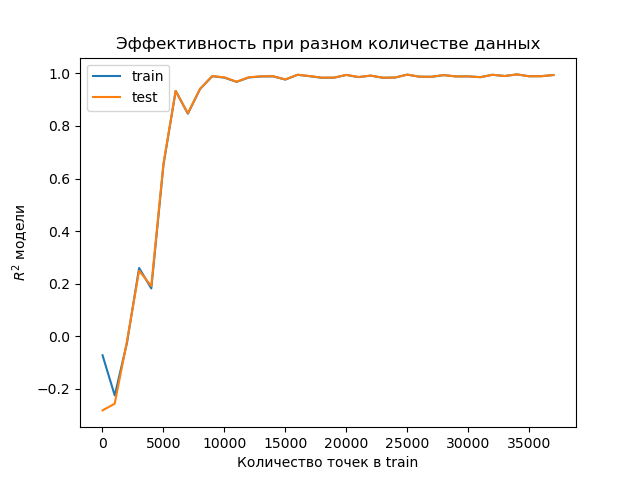

In [67]:
plt.figure()
plt.plot(dataset_size, train_score, label="train")
plt.plot(dataset_size, test_score, label="test")
plt.legend()
plt.xlabel("Количество точек в train")
plt.ylabel("$R^2$ модели")
plt.title("Эффективность при разном количестве данных")